In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

# Configure the notebook to display the plot inline
%matplotlib inline

In [2]:
data_folder = "../data"
# os.listdir(data_folder)
file_path = os.path.join(data_folder, "Meditation.csv")
df_raw = pd.read_csv(file_path)

In [3]:
# Select some columns for additional analysis
df = df_raw[['Date', 'Forgetting', 'Concentration', 'Mindfulness', 'Investigation', 'Energy', 'Tranquility', 'Distracted']]
# Convert the 'Date' column to datetime format
df.loc[:, 'Date'] = pd.to_datetime(df['Date'])
# Set the 'Date' column as the index of the DataFrame
df.set_index('Date', inplace=True)

In [4]:
# Display the first 5 rows of the DataFrame
print(df.head())

                     Forgetting  Concentration  Mindfulness  Investigation   
Date                                                                         
2023-03-31 13:58:58           2              2            2            1.0  \
2023-03-31 07:53:28           3              1            0            0.0   
2023-04-01 14:56:07           2              1            2            1.0   
2023-04-01 20:07:51           2              3            3            1.0   
2023-04-02 08:03:22           1              2            1            0.0   

                     Energy  Tranquility  Distracted  
Date                                                  
2023-03-31 13:58:58       1            2         NaN  
2023-03-31 07:53:28       1            0         NaN  
2023-04-01 14:56:07       1            1         NaN  
2023-04-01 20:07:51       2            3         NaN  
2023-04-02 08:03:22       1            2         NaN  


In [5]:
def plot(df, frequency=None, sampling_method='mean', max_metrics_per_subplot=None):
    # Create a dictionary to map frequency strings to pandas offset aliases
    freq_dict = {
        'hourly': 'H',
        'daily': 'D',
        'weekly': 'W',
        'biweekly': '2W',
        'monthly': 'M',
        'yearly': 'Y'
    }
    
    # Resample the data if frequency is not None
    if frequency is not None:
        # Convert frequency string to pandas offset alias
        resample_frequency = freq_dict[frequency]
        
        # Resample the data
        if sampling_method == 'mean':
            df = df.resample(resample_frequency).mean()
        elif sampling_method == 'min':
            df = df.resample(resample_frequency).min()
        elif sampling_method == 'max':
            df = df.resample(resample_frequency).max()
        else:
            raise ValueError("Invalid method. Choose from 'mean', 'min', 'max'.")
    
    # Plot all metrics on the same plot if max_metrics_per_subplot is None
    if max_metrics_per_subplot is None:
        ax = df.plot(style='x-', grid=True, markersize=10, figsize=(15, 5))
        ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#         ax.minorticks_on()
        ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        plt.tight_layout()
        plt.show()
        return

    # Otherwise, create subplots
    num_metrics = len(df.columns)
    num_subplots = math.ceil(num_metrics / max_metrics_per_subplot)
    
    fig, axs = plt.subplots(num_subplots, 1, figsize=(15, 5 * num_subplots), sharex=True)
    if num_subplots == 1:
        axs = [axs]

    for i, ax in enumerate(axs):
        start = i * max_metrics_per_subplot
        end = min((i + 1) * max_metrics_per_subplot, num_metrics)
        df.iloc[:, start:end].plot(ax=ax, style='x-', grid=True, markersize=10)
        ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#         ax.minorticks_on()
        ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    
    plt.tight_layout()
    plt.show()


In [ ]:
plot(df, frequency='daily', max_metrics_per_subplot=4)

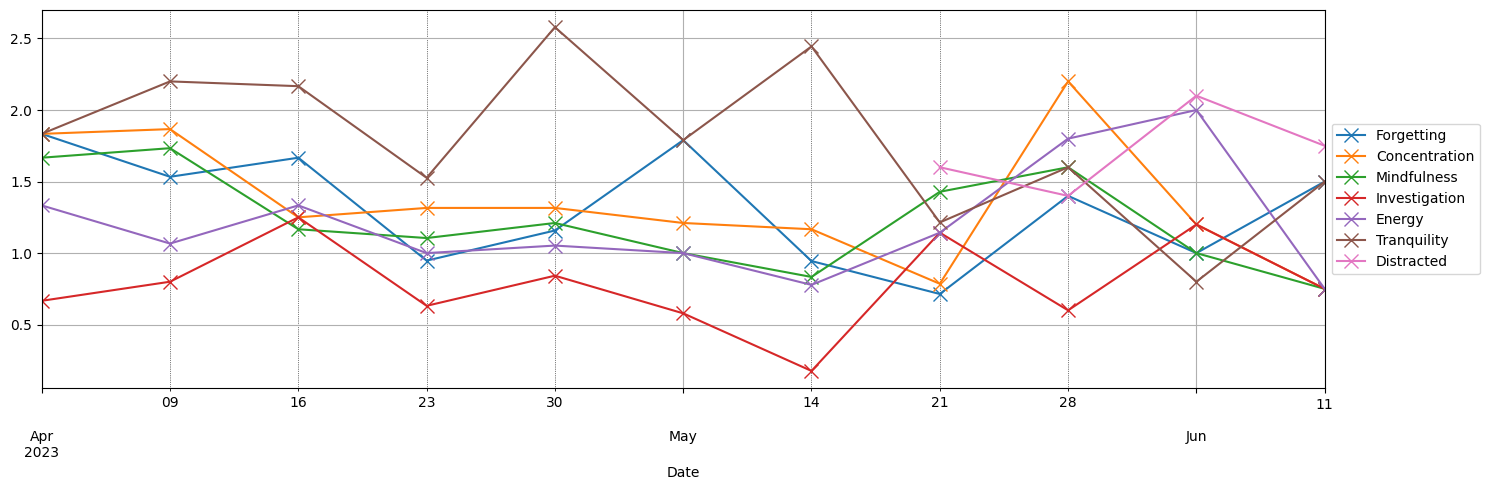

In [7]:
plot(df, frequency='weekly', sampling_method='mean')

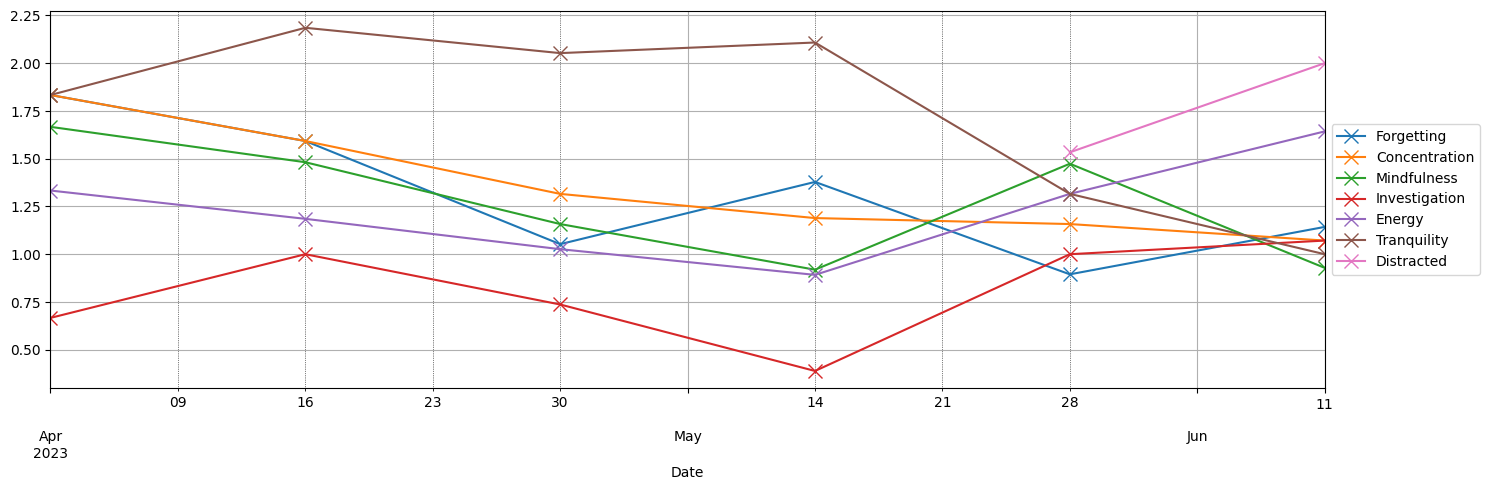

In [8]:
plot(df, frequency='biweekly', sampling_method='mean')

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def filtered_correlation_plot(df):
    """
    This function plots the filtered correlation matrix of a dataframe.

    Args:
    df (pd.DataFrame): A pandas DataFrame object

    Returns:
    corr_filtered (pd.DataFrame): A pandas DataFrame containing the filtered correlation matrix

    The function computes the correlation matrix of the input DataFrame, 
    sets diagonal values to NaN (correlations of variables with themselves), 
    and then filters the correlations based on their strength. 

    Two heatmaps are plotted - one with the original correlations and one with the filtered correlations. 

    The filtering process is as follows:
    - Correlations with absolute values less than 0.1 are set to 0
    - Correlations with absolute values less than 0.3 are set to 0.2 (keeping the original sign)
    - Correlations with absolute values less than 0.5 are set to 0.4 (keeping the original sign)
    - All other correlations are set to 0.8 (keeping the original sign)
    """
    
    # Compute the correlation matrix
    corr = df.corr()
    
    # Set diagonal values to NaN
    np.fill_diagonal(corr.values, np.nan)

    # Create the first subplot
    plt.figure(figsize=(10, 4.5))
    plt.subplot(1, 2, 1)
    sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap='coolwarm', annot=True)
    plt.title('Original Correlations')
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)

    # Filter the correlation values
    corr_filtered = corr.copy()
    for i in range(corr_filtered.shape[0]):
        for j in range(corr_filtered.shape[1]):
            value = corr_filtered.iloc[i, j]
            if abs(value) < 0.1:
                corr_filtered.iloc[i, j] = 0
            elif abs(value) < 0.3:
                corr_filtered.iloc[i, j] = np.sign(value) * 0.2
            elif abs(value) < 0.5:
                corr_filtered.iloc[i, j] = np.sign(value) * 0.4
            else:
                corr_filtered.iloc[i, j] = np.sign(value) * 0.8

    # Create the second subplot
    plt.subplot(1, 2, 2)
    sns.heatmap(corr_filtered, vmin=-1, vmax=1, center=0, cmap='coolwarm', annot=True)
    plt.title('Filtered Correlations')
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)

    plt.tight_layout()
    plt.show()

    return corr_filtered


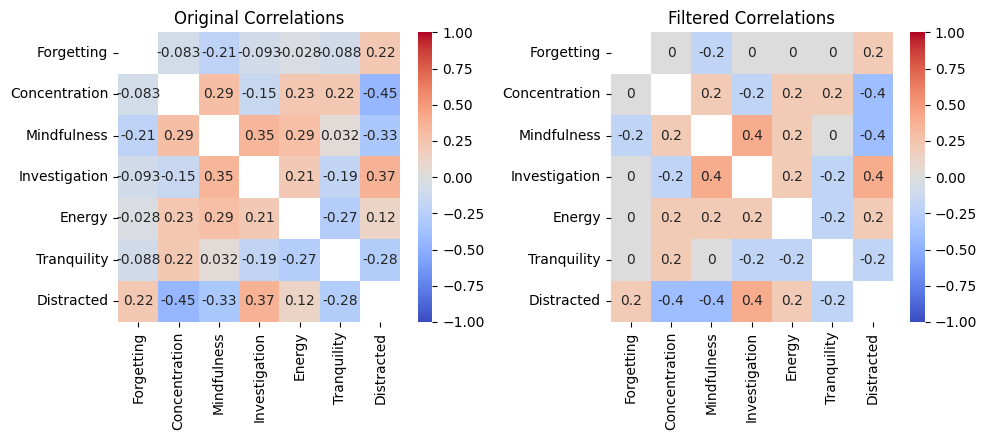

,Forgetting,Concentration,Mindfulness,Investigation,Energy,Tranquility,Distracted
Forgetting,NaN,0.0,-0.2,0.0,0.0,0.0,0.2
Concentration,0.0,NaN,0.2,-0.2,0.2,0.2,-0.4
Mindfulness,-0.2,0.2,NaN,0.4,0.2,0.0,-0.4
Investigation,0.0,-0.2,0.4,NaN,0.2,-0.2,0.4
Energy,0.0,0.2,0.2,0.2,NaN,-0.2,0.2
Tranquility,0.0,0.2,0.0,-0.2,-0.2,NaN,-0.2
Distracted,0.2,-0.4,-0.4,0.4,0.2,-0.2,NaN


In [26]:
filtered_correlation_plot(df)